# Kleene's Theorem (Part 1)

## Learning Objectives

After completing this chapter, you will be able to:

* Understand the statement of Kleene's Theorem.
* Create a DFA that recognizes the language generated by a given regular expression.

As in the last chapter, we'll be creating some directed graphs, so we'll import the libraries for doing so.

In [ ]:
from graphviz import Digraph, Source
from IPython.display import Image

## 1. Kleene's Theorem

We have so far seen three primary ways of defining a language:

1. The set of all strings over an alphabet recognized by a DFA.
2. The set of all strings over an alphabet recognized by a NFA.
3. The set of all strings generated by a regular expression.

In Chapter 4, we proved that for any NFA there is a DFA that recognizes the same language, and so the sets of languages we can define using the first two methods are equal. *Kleene's Theorem* states that the sets of languages we can define using all three methods are equal. This means for every regular expression, there is a DFA that recognizes exactly the language generated by that regular expression, and for every NFA, there is a regular expression that generates exactly the language recognized by the NFA.

In this chapter we'll prove the first of these equalities - that for every regular expression there is a DFA that recognizes exactly the language generated by the regular expression. In the next chapter we'll prove the second equality.

## 2. Generated by a Regular Expression $\subseteq$ Recognized by a DFA

We will now prove that any language generated by a regular expression can be recognized by a DFA. This proof will be constructive, and the algorithm for the construction is known as *Thompson's construction*, after the computer sciencist Ken Thompson.

First, we recall the definition of a regular expression from Chapter 2:

---

**Definition**
Formally, the set of *regular expressions* over an alphabet $\Sigma$ is defined by the rules:

* **Rule 1**: Every letter of $\Sigma$ can be made into a regular expression by writing it in boldface; $\boldsymbol{\lambda}$ (the empty string) is a regular expression.

* **Rule 2**: If $\textbf{r}_{1}$ and $\textbf{r}_{2}$ are regular expressions, then so are:

  * $(\textbf{r}_{1})$
  * $\textbf{r}_{1}$ $\textbf{r}_{2}$
  * $\textbf{r}_{1}$ + $\textbf{r}_{2}$
  * $\textbf{r}_{1}^{*}$

* **Rule 3**: Nothing else is a regular expression.

---

So, in order to prove the languages generated by regular expressions can all be recognized by DFAs, we must first prove that all languages generated by Rule 1 can be recognized by DFAs (easy), and then demonstrate how we handle the operations from Rule 2, namely unions, products, and Kleene stars (harder). If we can do this, then according to Rule 3 we're done!

This proof will cover everything you need to know, but will be a bit less formal that you'd see in a precise writeup, and will lean on demonstrations. We'll assume in each demonstration that our alphabet is $\Sigma = \{a,b\}$. It should be straightforward how things would generalize to larger alphabets.

### 2.1 The Empty String and Single Letters

A DFA that recognizes just the empty string is:

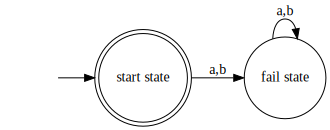

In [ ]:
empty = Digraph()
empty.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
empty.node('', shape='none')
empty.edge('', 'start state')

# States
with empty.subgraph() as start:
  start.attr(rank='same')
  start.node('start state', shape='doublecircle')
with empty.subgraph() as fail:
  fail.attr(rank='same')
  fail.node('fail state', shape='circle')

# Transitions
empty.edge('start state', 'fail state', label='a,b')
empty.edge('fail state', 'fail state', label='a,b')

Source(empty.source)

A DFA that accepts only a string of one letter (say $a$) is:

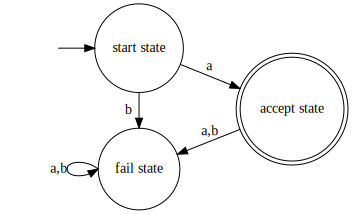

In [ ]:
letter = Digraph()
letter.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
letter.node('', shape='none')
letter.edge('', 'start state')

# States
with letter.subgraph() as fail:
  fail.attr(rank='same')
  fail.node('start state', shape='circle')
  fail.node('fail state', shape='circle')
with letter.subgraph() as success:
  success.attr(rank='same')
  success.node('accept state', shape='doublecircle')

# Transitions
letter.edge('start state', 'accept state', label='a')
letter.edge('start state', 'fail state', label='b')
letter.edge('accept state', 'fail state', label='a,b')
letter.edge('fail state', 'fail state', tailport='w', headport='w', label='a,b')

Source(letter.source)

### 2.2 Unions

To take the union of two DFAs, say $DFA_{1} + DFA_{2}$, you need to create another finite automata $DFA_{3}$, where the nodes of $DFA_{3}$ are products of nodes from $DFA_{1}$ and $DFA_{2}$, and the transitions go between these products. The start state is the product of both start states, and the accept states are those where one or the other (but not necessarily both) nodes in the product are final states.

Let's go over this with an example. Suppose the DFA below is $DFA_{1}$:

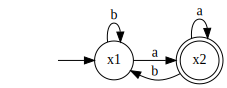

In [ ]:
dfa1 = Digraph()
dfa1.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
dfa1.node('', shape='none')
dfa1.edge('', 'x1')

# States
with dfa1.subgraph() as start:
  start.attr(rank='same')
  start.node('x1', shape='circle')
with dfa1.subgraph() as accept:
  accept.attr(rank='same')
  accept.node('x2', shape='doublecircle')

# Transitions
dfa1.edge('x1', 'x2', label='a')
dfa1.edge('x1', 'x1', label='b')
dfa1.edge('x2', 'x2', label='a')
dfa1.edge('x2', 'x1', label='b')

Source(dfa1.source)

The DFA below is $DFA_{2}$:

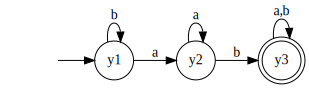

In [ ]:
dfa2 = Digraph()
dfa2.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
dfa2.node('', shape='none')
dfa2.edge('', 'y1')

# States
with dfa2.subgraph() as start:
  start.attr(rank='same')
  start.node('y1', shape='circle')
with dfa2.subgraph() as middle:
  middle.attr(rank='same')
  middle.node('y2', shape='circle')
with dfa2.subgraph() as accept:
  accept.attr(rank='same')
  accept.node('y3', shape='doublecircle')

# Transitions
dfa2.edge('y1', 'y1', label='b')
dfa2.edge('y1', 'y2', label='a')
dfa2.edge('y2', 'y2', label='a')
dfa2.edge('y2', 'y3', label='b')
dfa2.edge('y3', 'y3', label='a,b')

Source(dfa2.source)

The union of these two DFAs, $DFA_{3}$, would be:

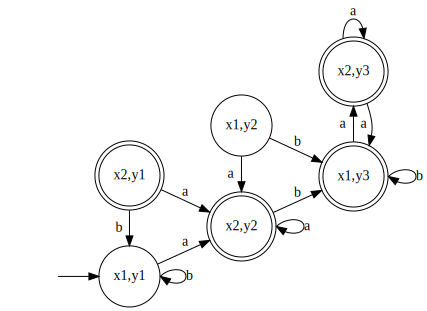

In [ ]:
dfa3 = Digraph()
dfa3.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
dfa3.node('', shape='none')
dfa3.edge('', 'x1,y1')

# States
with dfa3.subgraph() as start:
  start.attr(rank='same')
  start.node('x1,y1', shape='circle')
  start.node('x2,y1', shape='doublecircle')
with dfa3.subgraph() as middle:
  middle.attr(rank='same')
  middle.node('x1,y2', shape='circle')
  middle.node('x2,y2', shape='doublecircle')
with dfa3.subgraph() as accept:
  accept.attr(rank='same')
  accept.node('x1,y3', shape='doublecircle')
  accept.node('x2,y3', shape='doublecircle')

# Transitions
dfa3.edge('x1,y1', 'x2,y2', label='a')
dfa3.edge('x1,y1', 'x1,y1', tailport='e', headport='e', label='b')
dfa3.edge('x2,y1', 'x2,y2', label='a')
dfa3.edge('x2,y1', 'x1,y1', label='b')
dfa3.edge('x1,y2', 'x2,y2', label='a')
dfa3.edge('x1,y2', 'x1,y3', label='b')
dfa3.edge('x2,y2', 'x2,y2', tailport='e', headport='e', label='a')
dfa3.edge('x2,y2', 'x1,y3', label='b')
dfa3.edge('x1,y3', 'x2,y3', label='a')
dfa3.edge('x1,y3', 'x1,y3', tailport='e', headport='e', label='b')
dfa3.edge('x2,y3', 'x2,y3', label='a')
dfa3.edge('x2,y3', 'x1,y3', label='a')


Source(dfa3.source)

Now, this would be correct, but we can note there's no way to reach $(x2,y1)$ or $(x1,y2)$ from the start state $(x1,y1)$. We can eliminate them and have an equivalent DFA:

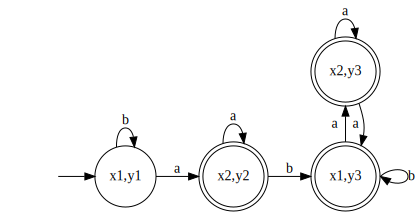

In [ ]:
dfa3reduced = Digraph()
dfa3reduced.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
dfa3reduced.node('', shape='none')
dfa3reduced.edge('', 'x1,y1')

# States
with dfa3reduced.subgraph() as start:
  start.attr(rank='same')
  start.node('x1,y1', shape='circle')
with dfa3reduced.subgraph() as middle:
  middle.attr(rank='same')
  middle.node('x2,y2', shape='doublecircle')
with dfa3reduced.subgraph() as accept:
  accept.attr(rank='same')
  accept.node('x1,y3', shape='doublecircle')
  accept.node('x2,y3', shape='doublecircle')

# Transitions
dfa3reduced.edge('x1,y1', 'x2,y2', label='a')
dfa3reduced.edge('x1,y1', 'x1,y1', label='b')
dfa3reduced.edge('x2,y2', 'x2,y2', label='a')
dfa3reduced.edge('x2,y2', 'x1,y3', label='b')
dfa3reduced.edge('x1,y3', 'x2,y3', label='a')
dfa3reduced.edge('x1,y3', 'x1,y3', tailport='e', headport='e', label='b')
dfa3reduced.edge('x2,y3', 'x2,y3', label='a')
dfa3reduced.edge('x2,y3', 'x1,y3', label='a')

Source(dfa3reduced.source)

### 2.3 Products

To take the product of two finite automata, say $DFA_{1}DFA_{2}$, you need to create another finite automata $DFA_{3}$, where the nodes of $DFA_{3}$ are of the form $x \times Y$, where $x$ is a node in $DFA_{1}$, and $Y$ is a (possibly empty) subset of the nodes from $DFA_{2}$. The transitions move the $x$ term within $DFA_{1}$, and any time you're at a final state in $DFA_{1}$ you add the initial state of $DFA_{2}$ to $Y$ if it's not there already. The final states are those where $Y$ contains a  final state of $DFA_{2}$.

For example, if $DFA_{1}$ and $DFA_{2}$ are the two DFAs from Subsection 5.2.2, then their product is:

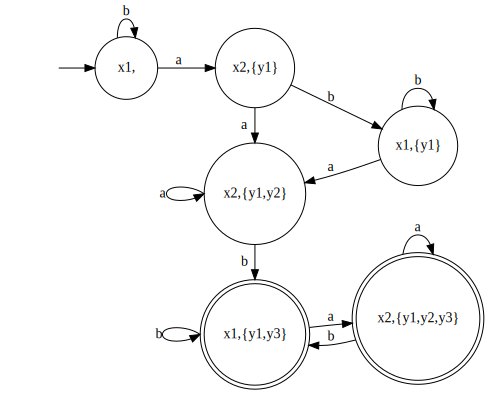

In [ ]:
dfa3 = Digraph()
dfa3.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
dfa3.node('', shape='none')
dfa3.edge('', 'x1,0')

# States
with dfa3.subgraph() as start:
  start.attr(rank='same')
  start.node('x1,0', label='x1,∅', shape='circle')
with dfa3.subgraph() as middle:
  middle.attr(rank='same')
  middle.node('x2,{y1}', shape='circle')
  middle.node('x2,{y1,y2}', shape='circle')
  middle.node('x1,{y1,y3}', shape='doublecircle')
with dfa3.subgraph() as end:
  end.attr(rank='same')
  end.node('x1,{y1}', shape='circle')
  end.node('x2,{y1,y2,y3}', shape='doublecircle')

# Transitions
dfa3.edge('x1,0', 'x2,{y1}', label='a')
dfa3.edge('x1,0', 'x1,0', label='b')
dfa3.edge('x2,{y1}', 'x2,{y1,y2}', label='a')
dfa3.edge('x2,{y1}', 'x1,{y1}', label='b')
dfa3.edge('x1,{y1}', 'x2,{y1,y2}', label='a')
dfa3.edge('x1,{y1}', 'x1,{y1}', label='b')
dfa3.edge('x2,{y1,y2}', 'x2,{y1,y2}', tailport='w', headport='w', label='a')
dfa3.edge('x2,{y1,y2}', 'x1,{y1,y3}', label='b')
dfa3.edge('x1,{y1,y3}', 'x2,{y1,y2,y3}', label='a')
dfa3.edge('x1,{y1,y3}', 'x1,{y1,y3}', tailport='w', headport='w', label='b')
dfa3.edge('x2,{y1,y2,y3}', 'x2,{y1,y2,y3}', label='a')
dfa3.edge('x2,{y1,y2,y3}', 'x1,{y1,y3}', label='b')

Source(dfa3.source)

### 2.4 Kleene Star

To take the Kleene star of a DFA, say $DFA_{1}$, you need to create another finite automata $DFA_{2}$ where the nodes of $DFA_{2}$ are subsets of the nodes from $DFA_{1}$. The transitions act on all the nodes from the subset, and any time the subset includes a final state from $DFA_{1}$, you add the initial state of $DFA_{1}$ if it's not already there. The start state of $DFA_{2}$ corresponds with the empty set, and transitions to the states to which the start state of $DFA_{1}$ transitions. The accepting states of $DFA_{2}$ are the start state, and any state the contains a start state of $DFA_{1}$ in its subset.

For example, suppose the DFA below is $DFA_{1}$:

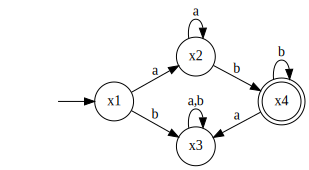

In [ ]:
dfa1 = Digraph()
dfa1.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
dfa1.node('', shape='none')
dfa1.edge('', 'x1')

# States
with dfa1.subgraph() as start:
  start.attr(rank='same')
  start.node('x1', shape='circle')
with dfa1.subgraph() as middle:
  middle.attr(rank='same')
  middle.node('x2', shape='circle')
  middle.node('x3', shape='circle')
with dfa1.subgraph() as end:
  end.attr(rank='same')
  end.node('x4', shape='doublecircle')

# Transitions
dfa1.edge('x1', 'x2', label='a')
dfa1.edge('x1', 'x3', label='b')
dfa1.edge('x2', 'x2', label='a')
dfa1.edge('x2', 'x4', label='b')
dfa1.edge('x3', 'x3', label='a,b')
dfa1.edge('x4', 'x3', label='a')
dfa1.edge('x4', 'x4', label='b')

Source(dfa1.source)

The Kleene star of $DFA_{1}$ would be:

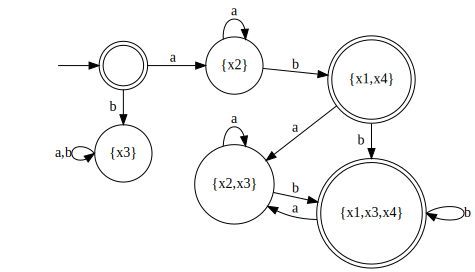

In [ ]:
dfa2 = Digraph()
dfa2.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
dfa2.node('', shape='none')
dfa2.edge('', '0')

# States
with dfa2.subgraph() as start:
  start.attr(rank='same')
  start.node('0', label='∅', shape='doublecircle')
  start.node('{x3}', shape='circle')
with dfa2.subgraph() as middle:
  middle.attr(rank='same')
  middle.node('{x2}', shape='circle')
  middle.node('{x2,x3}', shape='circle')
with dfa2.subgraph() as end:
  end.attr(rank='same')
  end.node('{x1,x4}', shape='doublecircle')
  end.node('{x1,x3,x4}', shape='doublecircle')

# Transitions
dfa2.edge('0', '{x2}', label='a')
dfa2.edge('0', '{x3}', label='b')
dfa2.edge('{x2}', '{x2}', label='a')
dfa2.edge('{x2}', '{x1,x4}', label='b')
dfa2.edge('{x3}', '{x3}', tailport='w', headport='w', label='a,b')
dfa2.edge('{x1,x4}', '{x2,x3}', label='a')
dfa2.edge('{x1,x4}', '{x1,x3,x4}', label='b')
dfa2.edge('{x2,x3}', '{x2,x3}', label='a')
dfa2.edge('{x2,x3}', '{x1,x3,x4}', label='b')
dfa2.edge('{x1,x3,x4}', '{x2,x3}', label='a')
dfa2.edge('{x1,x3,x4}', '{x1,x3,x4}', tailport='e', headport='e', label='b')

Source(dfa2.source)

That's it! Now that we can generate the basic building blocks (the empty string and single characters), and how we build with them (unions, products, and stars) we can generate a DFA that recognizes the languages generated by any given regular expression.

## 3. Practice Exercises

Suppose $DFA_{1}$ is:

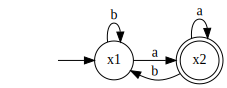

In [ ]:
dfa1 = Digraph()
dfa1.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
dfa1.node('', shape='none')
dfa1.edge('', 'x1')

# States
with dfa1.subgraph() as start:
  start.attr(rank='same')
  start.node('x1', shape='circle')
with dfa1.subgraph() as accept:
  accept.attr(rank='same')
  accept.node('x2', shape='doublecircle')

# Transitions
dfa1.edge('x1', 'x2', label='a')
dfa1.edge('x1', 'x1', label='b')
dfa1.edge('x2', 'x2', label='a')
dfa1.edge('x2', 'x1', label='b')

Source(dfa1.source)

And $DFA_{2}$ is:

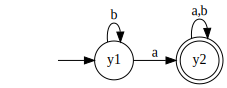

In [ ]:
dfa2 = Digraph()
dfa2.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
dfa2.node('', shape='none')
dfa2.edge('', 'y1')

# States
with dfa2.subgraph() as start:
  start.attr(rank='same')
  start.node('y1', shape='circle')
with dfa2.subgraph() as accept:
  accept.attr(rank='same')
  accept.node('y2', shape='doublecircle')

# Transitions
dfa2.edge('y1', 'y2', label='a')
dfa2.edge('y1', 'y1', label='b')
dfa2.edge('y2', 'y2', label='a,b')

Source(dfa2.source)

**Exercise 1**: What is the union $DFA_{1} + DFA_{2}$? What language does it recognize?

**Exercise 2**: What is the product $DFA_{1}DFA_{2}$? What language does it recognize?

**Exercise 3**: What is $DFA_{1}^{*}$? What language does it recognize?

## 4. Further Reading

* [Introduction to Computer Theory](https://www.amazon.com/Introduction-Computer-Theory-Daniel-Cohen/dp/0471137723) (Second Edition) by Daniel I.A. Cohen

  *Chapter 7 - Kleene's Theorem*

* [Automata Theory, Languages, and Computation](https://www.amazon.com/Introduction-Automata-Theory-Languages-Computation/dp/0321462254) (Third Edition) by Hopcroft, Motwani, and Ullman

  *Section 3.2 - Finite Automata and Regular Expressions*

* [Introduction to the Theory of Computation](https://www.cengage.com/c/introduction-to-the-theory-of-computation-3e-sipser/9781133187790/) (Third Edition) by Michael Sipser
  
  *Section 1.2 - Nondeterminism,* *Section 1.3 - Regular Expressions*

* [Thompson's Construction](https://en.wikipedia.org/wiki/Thompson%27s_construction)